In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing_price_dataset.csv')

In [3]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
data.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [11]:
data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [6]:
data['Bedrooms'].value_counts()

3    12661
5    12468
2    12436
4    12435
Name: Bedrooms, dtype: int64

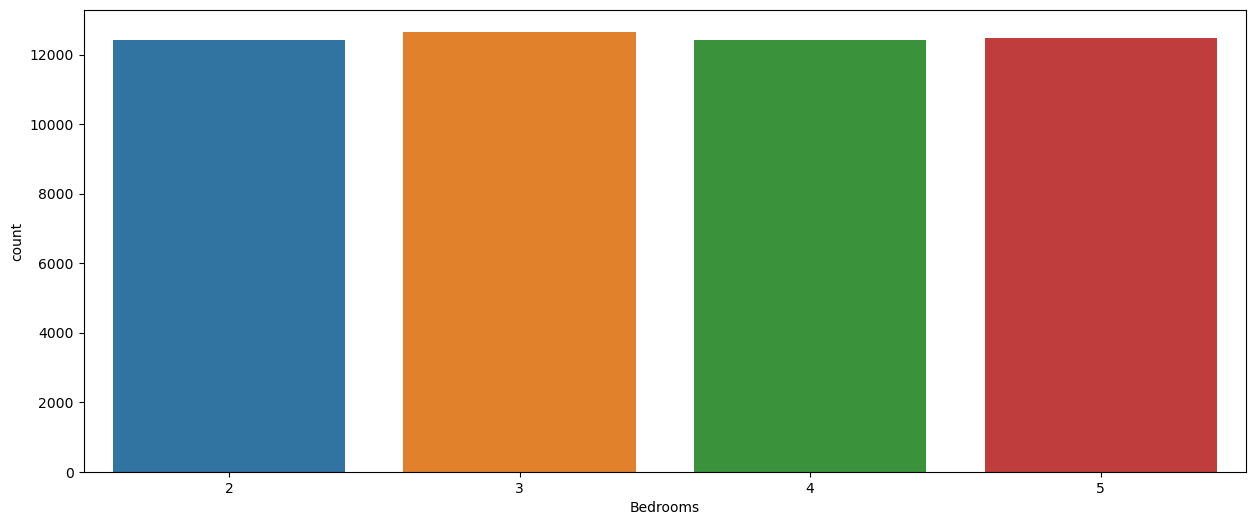

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Bedrooms')
plt.show()

In [17]:
data['Bathrooms'].value_counts()

1    16755
2    16719
3    16526
Name: Bathrooms, dtype: int64

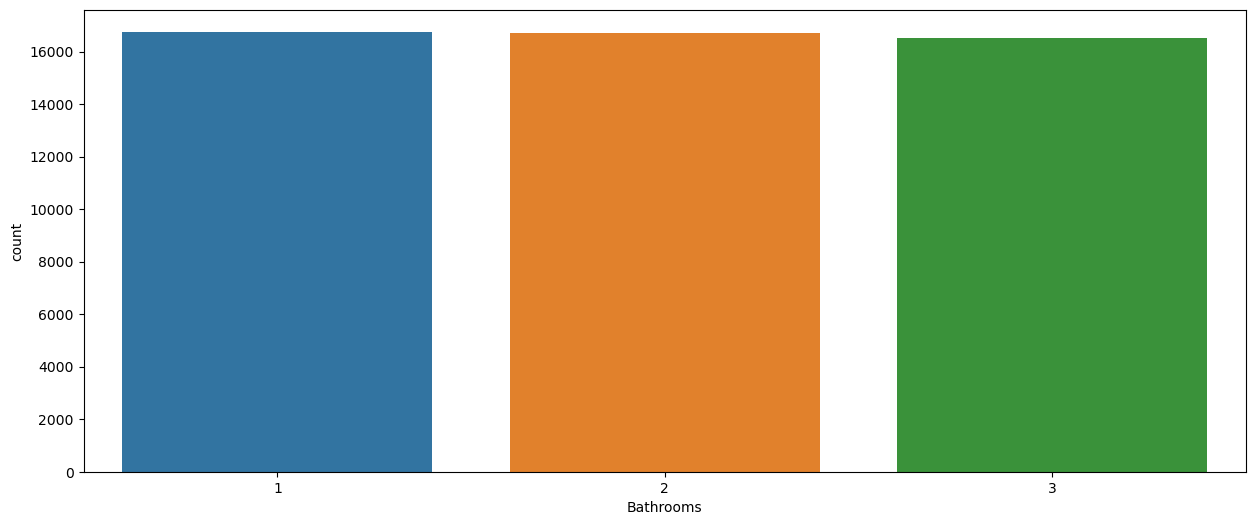

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Bathrooms')
plt.show()

In [12]:
data['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

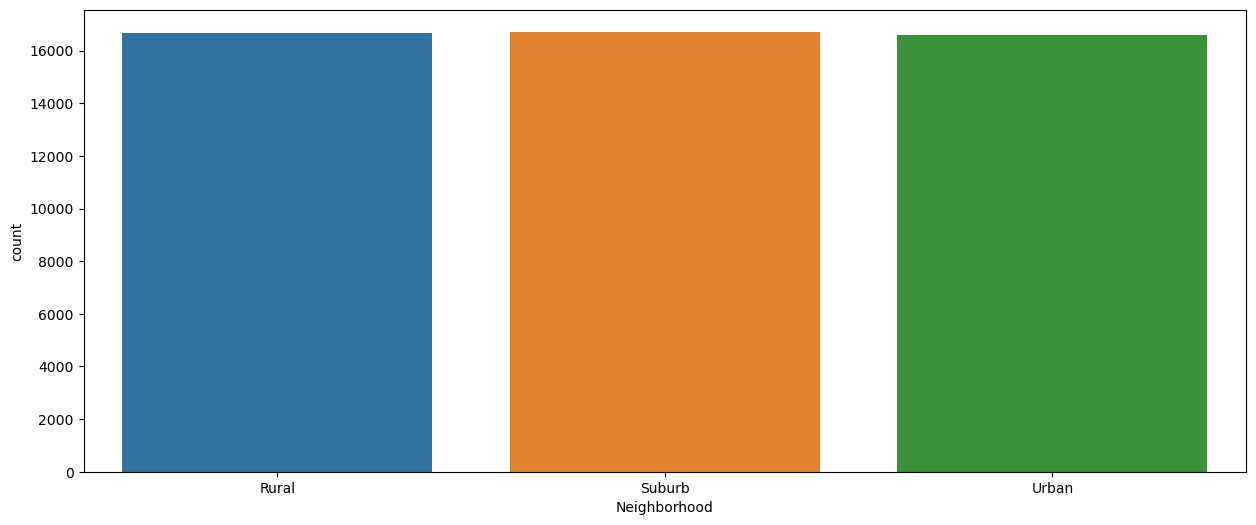

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Neighborhood')
plt.show()

In [22]:
data.drop(['YearBuilt'],axis=1,inplace=True)

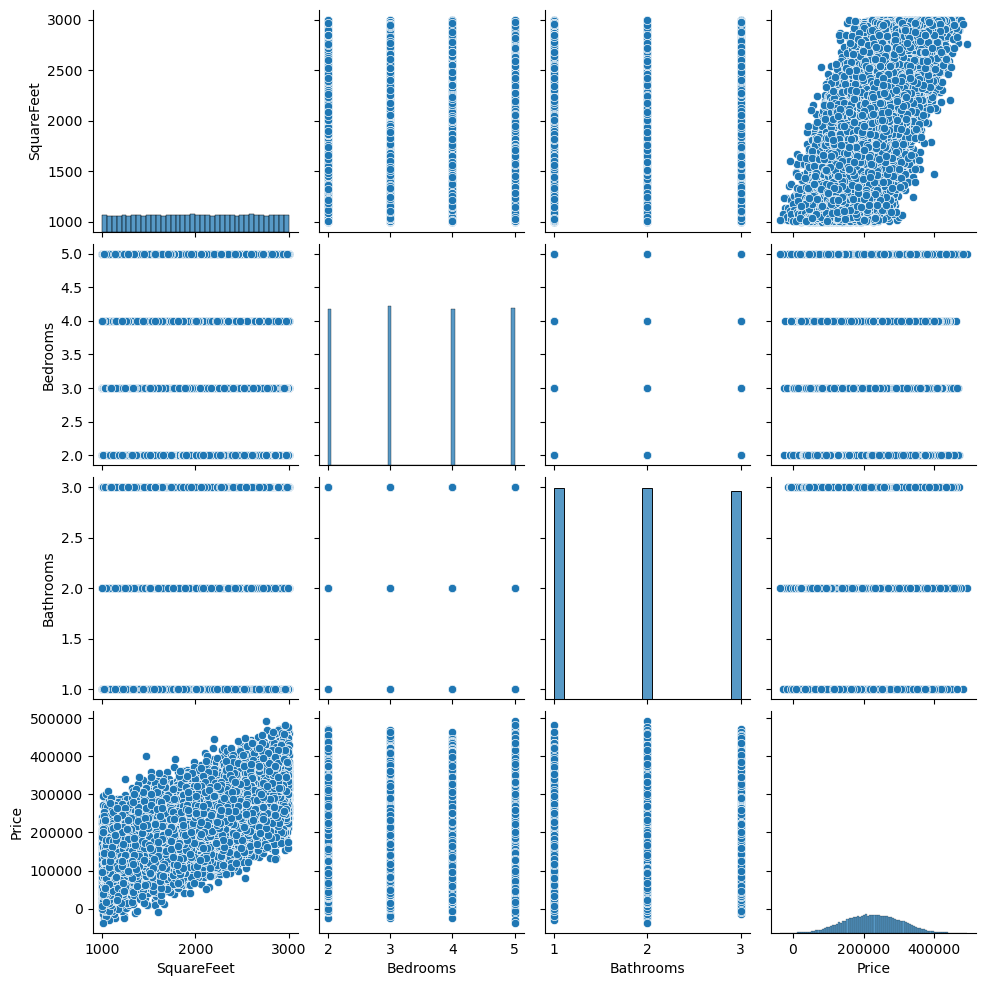

In [23]:
sns.pairplot(data)

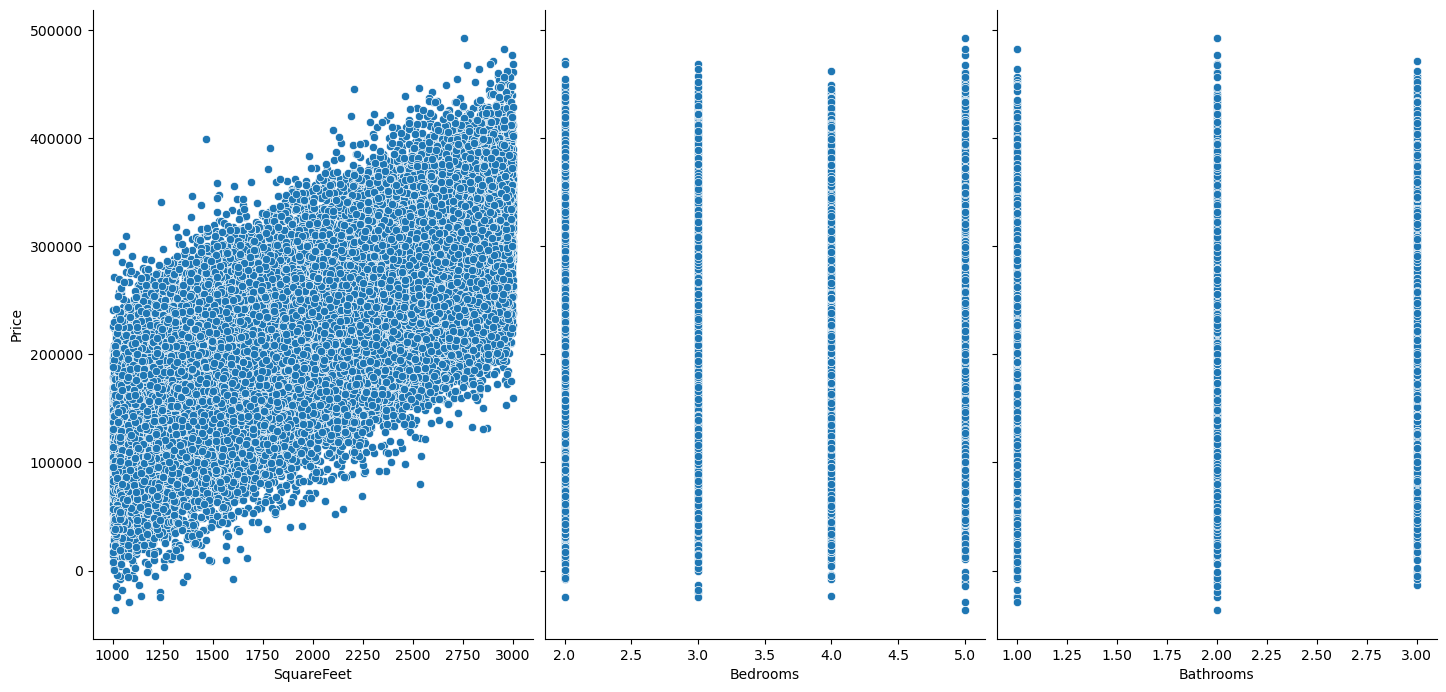

In [24]:
sns.pairplot(data, x_vars=['SquareFeet','Bedrooms','Bathrooms'], y_vars='Price',height=7, aspect=0.7, kind='scatter')

C:\Users\Nisha Rawat\AppData\Local\Temp\ipykernel_16432\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

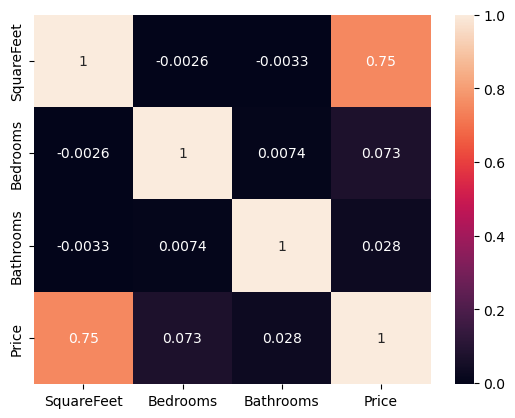

In [25]:
sns.heatmap(data.corr(),annot=True)

C:\Users\Nisha Rawat\AppData\Local\Temp\ipykernel_16432\4244922584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

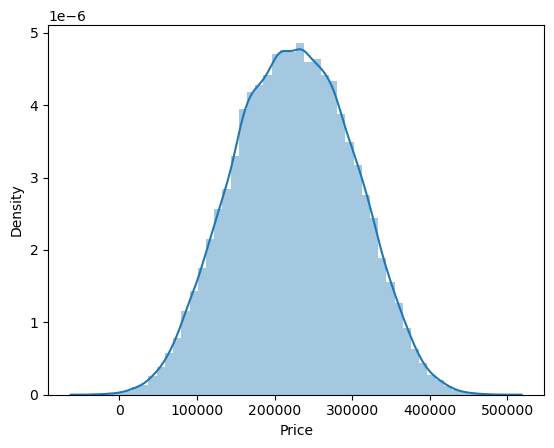

In [26]:
sns.distplot(data.Price)

In [27]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [28]:
X = data[['SquareFeet','Bedrooms','Bathrooms']]

# Putting response variable to y
y = data['Price']

In [30]:
X.head(10)

,SquareFeet,Bedrooms,Bathrooms
0,2126,4,1
1,2459,3,2
2,1860,2,1
3,2294,2,1
4,2130,5,2
5,2095,2,3
6,2724,2,1
7,2044,4,3
8,2638,4,3
9,1121,5,2


In [31]:
y.head(5)

0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: Price, dtype: float64

In [32]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 3)
(15000, 3)
(35000,)
(15000,)


In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
print(lm.intercept_)

224660.28829816013


In [38]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
0,57391.533471
1,5596.758204
2,2222.512803


In [39]:
y_pred = lm.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [41]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 2518363794.455147
r_square_value : 0.5650964456318419
